In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import ccf
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

/Users/nosratullah/opt/miniconda3/lib/python3.7/site-packages/statsmodels/compat/pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [3]:
path = '../data/stock_dfs/'
names = os.listdir(path)

In [4]:
main_df = pd.DataFrame()
for name in names[:10]:
    add = os.path.join(path, name)
    df = pd.read_csv(add, index_col=0)
    df.rename(columns={'Adj Close': name[:-4]}, inplace=True)
    df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
    if main_df.empty:
        main_df = df
    else:
        main_df = main_df.join(df, how='outer')

In [5]:
# Pearson Correlation between stock data
corr = main_df.corr()

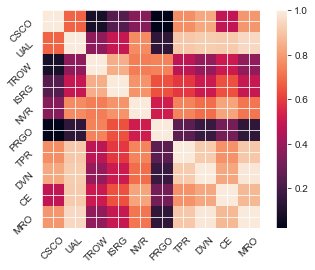

In [8]:
plt.imshow(corr)
plt.colorbar()
plt.xticks(np.arange(len(corr.columns.tolist())),corr.columns, rotation=45);
plt.yticks(np.arange(len(corr.columns.tolist())),corr.columns, rotation=45);

In [ ]:
MRO = main_df['MRO'].values
DVN = main_df['DVN'].values
UAL = main_df['UAL'].values